In [1]:
import cv2

In [2]:
#!pip install opencv-python

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
img = cv2.imread("flower.jpg")
img

array([[[19, 23, 48],
        [18, 22, 47],
        [18, 21, 49],
        ...,
        [23,  3,  2],
        [23,  3,  2],
        [23,  3,  2]],

       [[18, 22, 47],
        [18, 22, 47],
        [18, 21, 49],
        ...,
        [24,  4,  3],
        [24,  4,  3],
        [24,  4,  3]],

       [[20, 21, 49],
        [19, 20, 48],
        [17, 19, 49],
        ...,
        [24,  4,  3],
        [24,  4,  3],
        [24,  4,  3]],

       ...,

       [[28,  5,  9],
        [28,  5,  9],
        [28,  5,  9],
        ...,
        [27, 10, 13],
        [26,  9, 12],
        [26,  9, 12]],

       [[28,  5,  9],
        [28,  5,  9],
        [28,  5,  9],
        ...,
        [23,  9, 11],
        [24, 10, 12],
        [25, 11, 13]],

       [[28,  5,  9],
        [28,  5,  9],
        [28,  5,  9],
        ...,
        [26, 12, 14],
        [28, 14, 16],
        [31, 17, 19]]], dtype=uint8)

In [5]:
img.shape

(360, 639, 3)

In [6]:
img.size

690120

In [7]:
# Image Display using cv2
cv2.imshow("Image Display", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

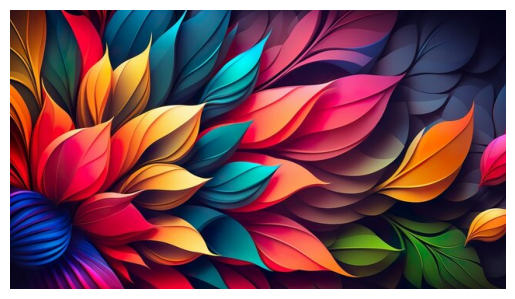

In [8]:
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.axis("off")
plt.show()

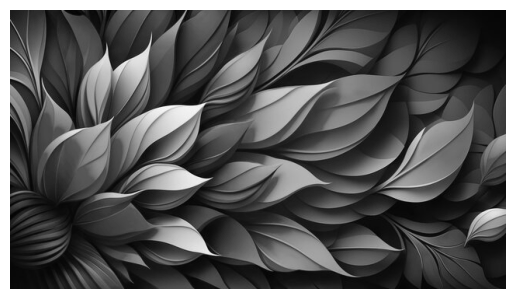

In [9]:
# Changing color space
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap="gray")
plt.axis("off")
plt.show()

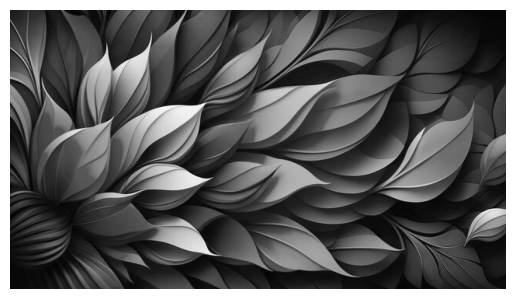

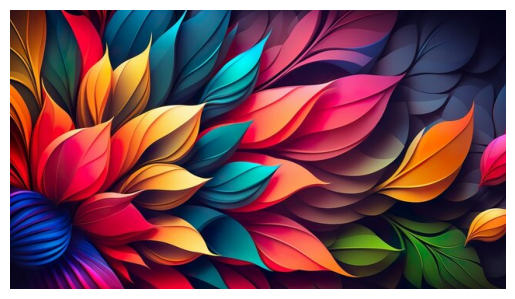

In [10]:
# code for converting rgb image to gray from scratch
def rgb_to_gray(rgb_image):
    height, width, _ = rgb_image.shape
    
    gray_image = np.zeros((height, width), dtype=np.uint8)
    for y in range(height):
        for x in range(width):
            red, green, blue = rgb_image[y, x]
            gray_value = int(0.2989*red + 0.5878*green + 0.1140*blue)
            gray_image[y, x] = gray_value
            
    return gray_image

rgb_img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gray_img2 = rgb_to_gray(rgb_img2)

plt.imshow(gray_img2, cmap="gray")
plt.axis("off")
plt.show()

plt.imshow(rgb_img2)
plt.axis("off")
plt.show()

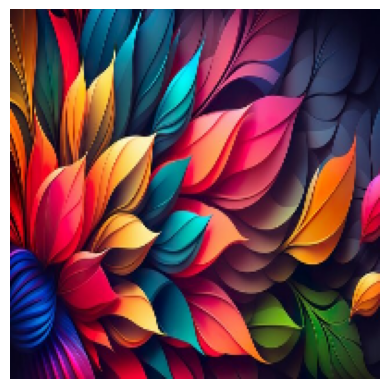

In [11]:
# resizing image
resized_img = cv2.resize(rgb_img, (200,200))
plt.imshow(resized_img)
plt.axis("off")
plt.show()

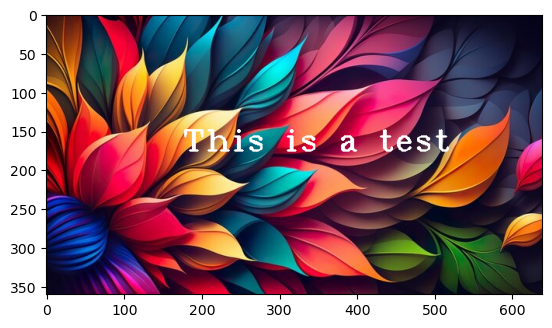

In [12]:
# Displaying text on image
img_with_text = cv2.putText(rgb_img, 'This is a test', (175,175), cv2.FONT_HERSHEY_COMPLEX_SMALL, 2, (255,255,255), 2)
plt.imshow(img_with_text)
# plt.axis("off")
plt.show()

## Spliting and Merging

In [13]:
print(img.shape)
print("Top Left", img[0,0])
print("Top Right", img[0,638])
print("Bottom Left", img[359,0])
print("Bottom Right", img[359,638])

cv2.imshow("color pic", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

(360, 639, 3)
Top Left [19 23 48]
Top Right [23  3  2]
Bottom Left [28  5  9]
Bottom Right [31 17 19]


In [14]:
blue = img[:, :, 0]
green = img[:, :, 1]
red = img[:, :, 2]

cv2.imshow("blue", blue)
cv2.imshow("green", green)
cv2.imshow("red", red)
cv2.imshow("original", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
b, g, r = cv2.split(img)

cv2.imshow("blue", b)
cv2.imshow("green", g)
cv2.imshow("red", r)
cv2.imshow("original", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
img_merge = cv2.merge((b, g, r))

cv2.imshow("merged_pic", img_merge)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Smoothing and Blurring

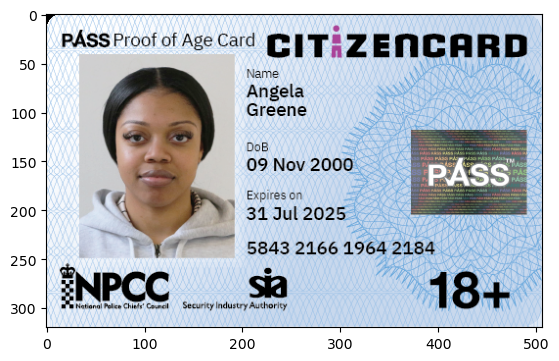

In [17]:
id = cv2.imread("id.webp")
id = cv2.cvtColor(id, cv2.COLOR_BGR2RGB)

plt.imshow(id)
plt.show()

In [44]:
id.shape, id.size

((320, 507, 3), 486720)

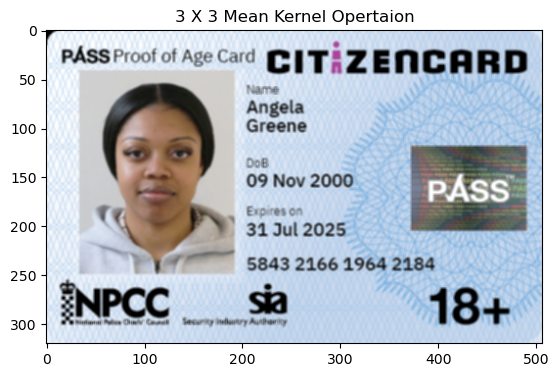

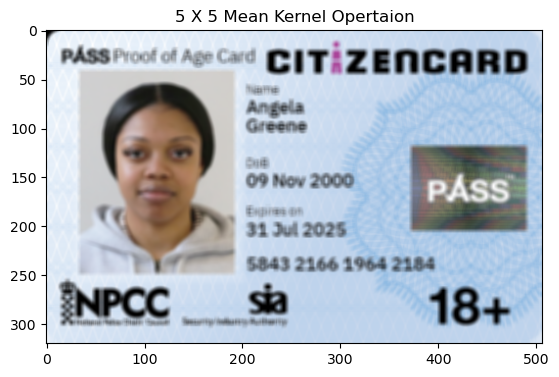

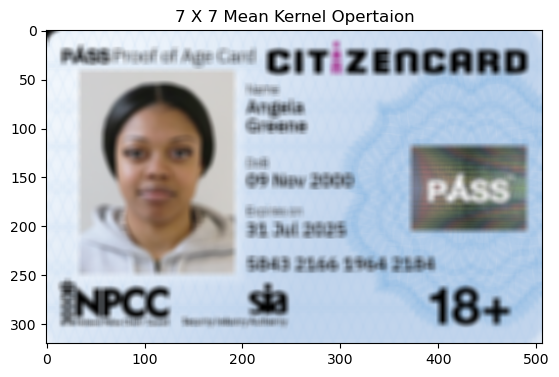

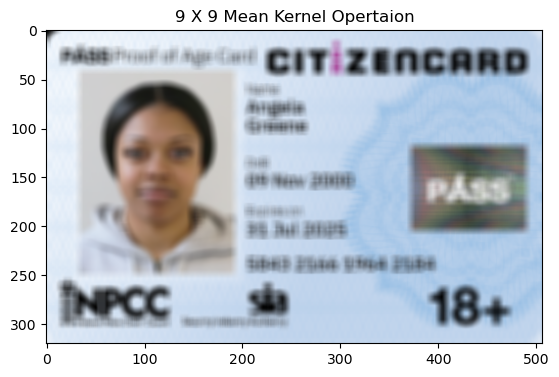

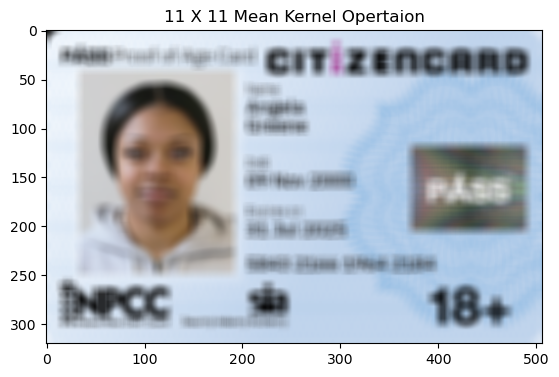

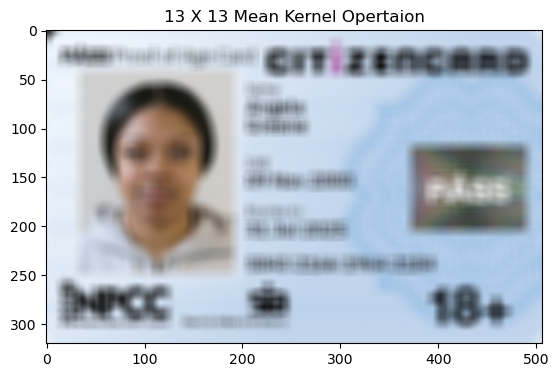

In [18]:
def mean_kernel(size):
    mk = np.ones((size, size), dtype = np.float32)/(size**2)
    return mk

for size in range(3, 14, 2):
    blur_img = cv2.filter2D(id, -1, mean_kernel(size))
    plt.figure()
    plt.imshow(blur_img)
    plt.title(f"{size} X {size} Mean Kernel Opertaion")

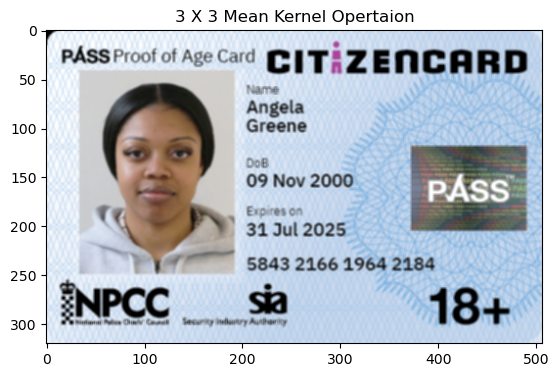

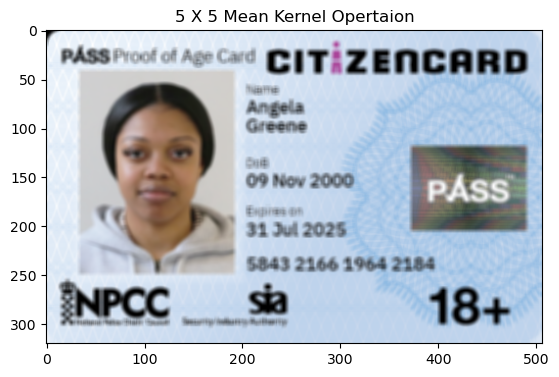

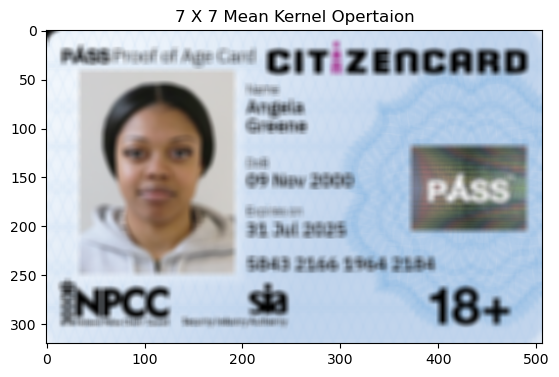

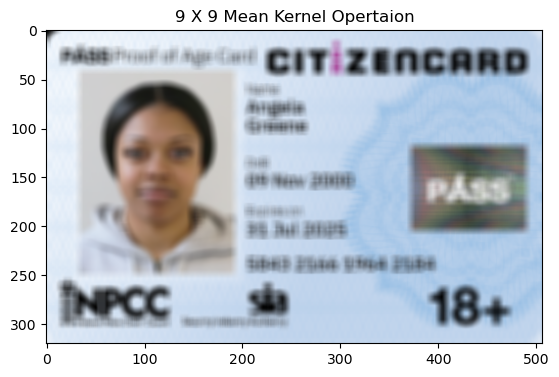

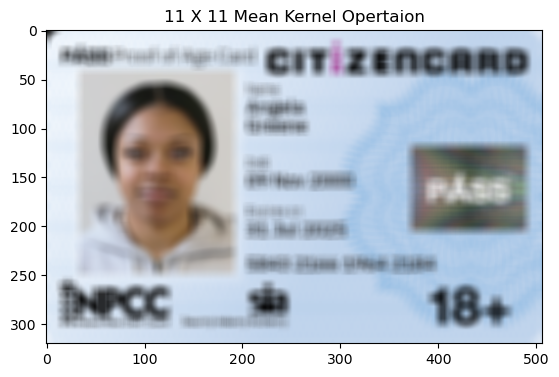

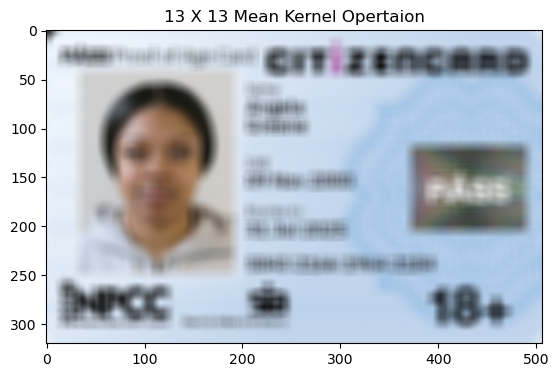

In [19]:
for size in range(3, 14, 2):
    blur_img = cv2.blur(id, (size, size))
    plt.figure()
    plt.imshow(blur_img)
    plt.title(f"{size} X {size} Mean Kernel Opertaion")

# Histograms

In [20]:
face_bgr = cv2.imread("face.jpg")
face = cv2.cvtColor(face_bgr, cv2.COLOR_BGR2RGB)

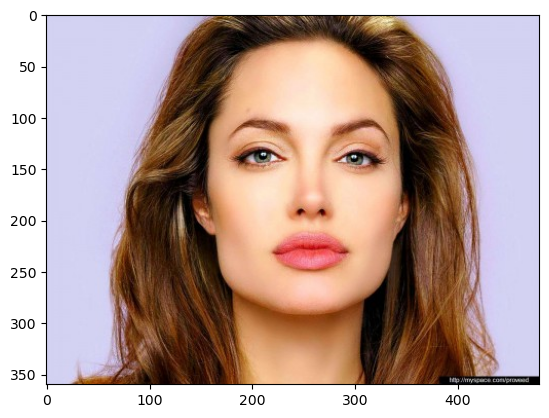

In [21]:
plt.imshow(face)
plt.show()

In [22]:
face.shape

(360, 480, 3)

In [23]:
face.size

518400

In [24]:
face.ravel().size

518400

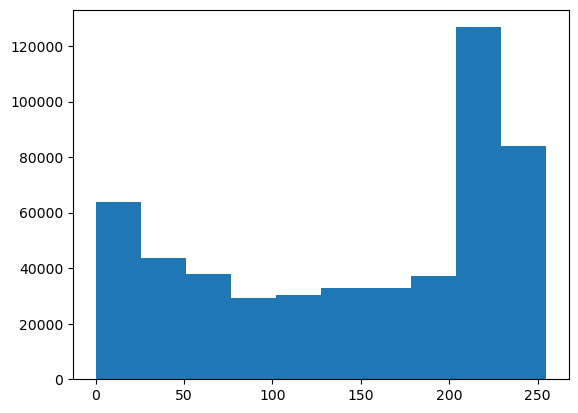

In [25]:
plt.hist(face.ravel())
plt.show()

In [26]:
colors = (b, g, r)
bgr_ravel = [face_bgr[:,:,0].ravel(), face_bgr[:,:,1].ravel(), face_bgr[:,:,2].ravel()]
bgr_ravel

[array([244, 242, 242, ...,   0,   2,   2], dtype=uint8),
 array([212, 210, 210, ...,   2,   2,   2], dtype=uint8),
 array([213, 211, 211, ...,   2,   2,   2], dtype=uint8)]

ValueError: RGBA sequence should have length 3 or 4

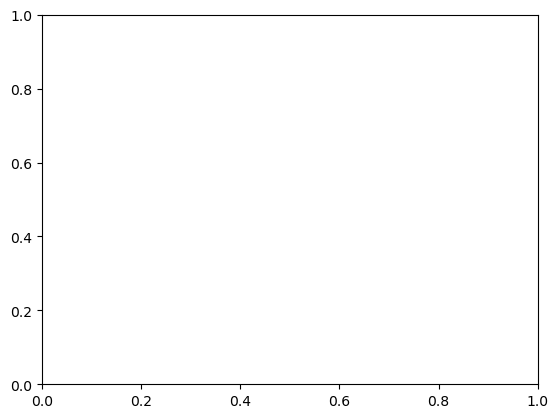

In [27]:
bgr_stacked = np.hstack(bgr_ravel)
plt.hist(bgr_stacked, color=colors, label=colors)
plt.legend()
plt.show()

### Simple Thresholding

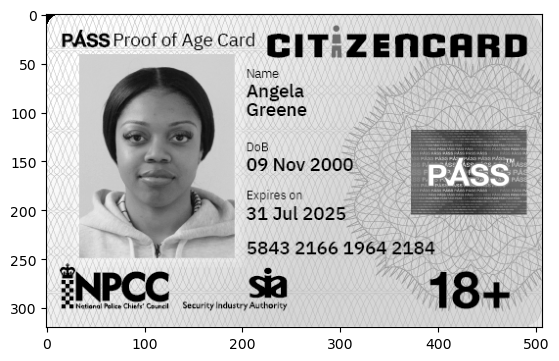

In [28]:
gray = cv2.cvtColor(id, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap="gray")
plt.show()

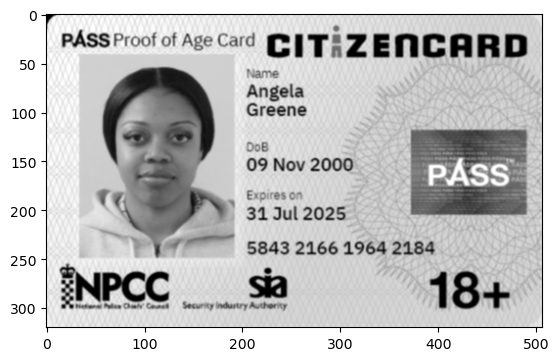

In [29]:
blurr = cv2.GaussianBlur(gray, (3,3), 0)

plt.imshow(blurr, cmap="gray")
plt.show()

## OTSU Thresholding

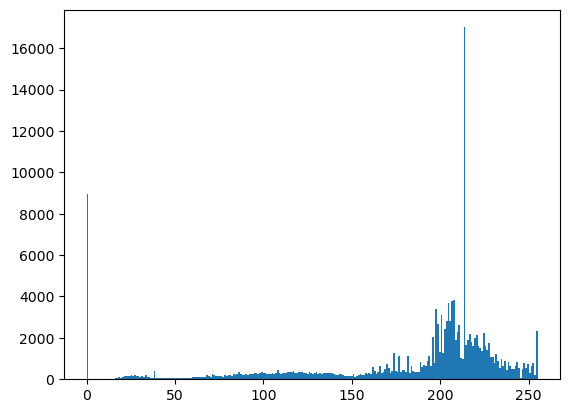

In [30]:
plt.hist(gray.ravel(), bins=256, range=[0,255])
plt.show()

200.0


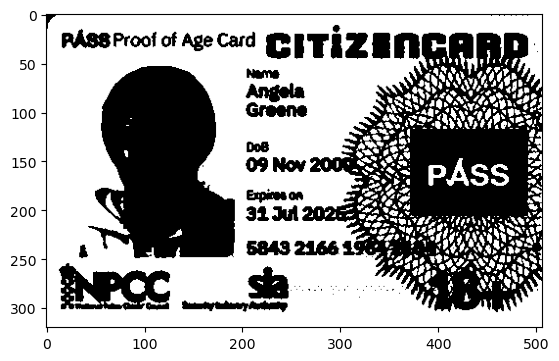

In [31]:
(t, simple_threshold) = cv2.threshold(blurr, 200, 255, cv2.THRESH_BINARY)

print(t)
plt.imshow(simple_threshold, cmap="Greys_r")
plt.show()

144.0


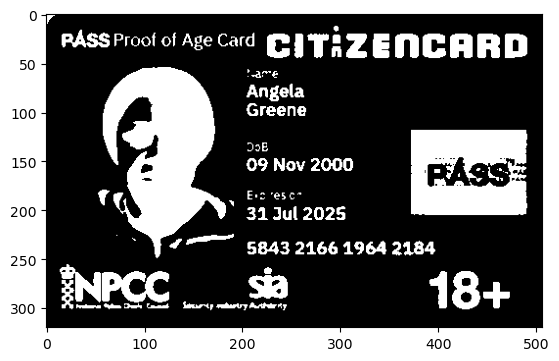

In [32]:
(T, otsu_threshold) = cv2.threshold(blurr, 0, 255, 
                                   cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
print(T)

plt.imshow(otsu_threshold, cmap="Greys_r")
plt.show()

144.0


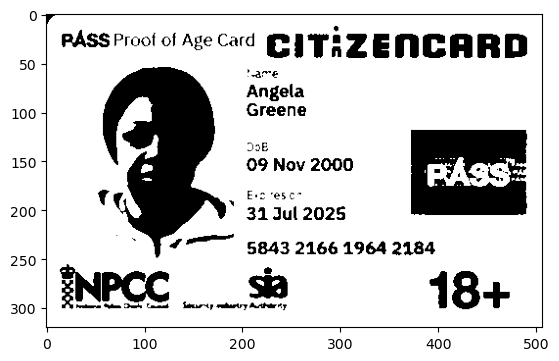

In [33]:
(t, simple_threshold_2) = cv2.threshold(blurr, 144, 255, cv2.THRESH_BINARY)

print(t)
plt.imshow(simple_threshold_2, cmap="Greys_r")
plt.show()

### Adaptive Threshold

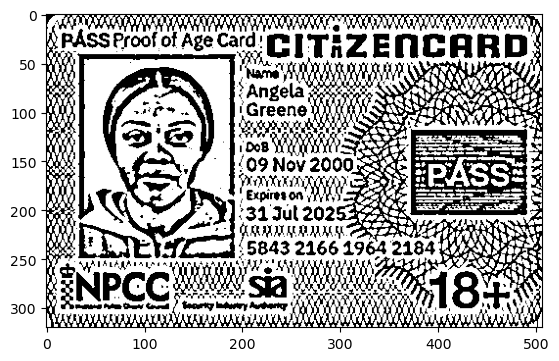

In [34]:
adp_thresh = cv2.adaptiveThreshold(blurr, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

plt.imshow(adp_thresh, cmap="Greys_r")
plt.show()

In [41]:
# Edge detection using Gradient

sobelx = cv2.Sobel(src=otsu_threshold, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)
sobely = cv2.Sobel(src=otsu_threshold, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)
sobelxy = cv2.Sobel(src=otsu_threshold, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)

cv2.imshow("Sobel X", sobelx)
# cv2.waitKey(0)

cv2.imshow("Sobel Y", sobely)
# cv2.waitKey(0)

cv2.imshow("Sobel X Y using sobel() function", sobelxy)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [38]:
edges = cv2.Canny(image=blurr, threshold1=100, threshold2=200)

# Display Canny Edge Detection
cv2.imshow("Canny Edge Detection", edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [39]:
contours, _ =cv2.findContours(adp_thresh, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_SIMPLE)

In [40]:
contours

(array([[[490, 317]],
 
        [[489, 318]],
 
        [[489, 319]],
 
        [[491, 319]],
 
        [[490, 318]]], dtype=int32),
 array([[[477, 317]],
 
        [[477, 318]],
 
        [[476, 319]],
 
        [[479, 319]],
 
        [[478, 318]],
 
        [[478, 317]]], dtype=int32),
 array([[[465, 317]],
 
        [[464, 318]],
 
        [[464, 319]],
 
        [[466, 319]],
 
        [[466, 317]]], dtype=int32),
 array([[[453, 317]],
 
        [[452, 318]],
 
        [[452, 319]],
 
        [[454, 319]],
 
        [[454, 318]]], dtype=int32),
 array([[[440, 317]],
 
        [[440, 319]],
 
        [[442, 319]],
 
        [[442, 318]],
 
        [[441, 317]]], dtype=int32),
 array([[[428, 317]],
 
        [[427, 318]],
 
        [[427, 319]],
 
        [[430, 319]],
 
        [[429, 318]],
 
        [[429, 317]]], dtype=int32),
 array([[[416, 317]],
 
        [[415, 318]],
 
        [[415, 319]],
 
        [[417, 319]],
 
        [[417, 318]]], dtype=int32),
 array([[[404, 317]],

Contours:  0 0 507 320
Area 131366.5
(320, 507, 3)


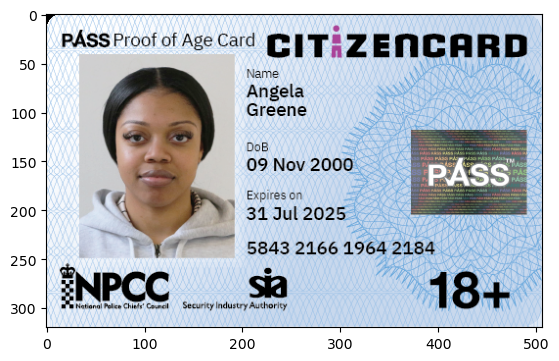

In [43]:
# Select the largest contour

largest_contour = None
largest_area = 0
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > largest_area:
        largest_area = area
        largest_contour = cnt
        
        
    x, y, w, h = cv2.boundingRect(largest_contour)
    
print("Contours: ", x, y, w, h)
print("Area", largest_area)

contour_id = id[y:y+h, x:x+w]
print(contour_id.shape)

plt.imshow(contour_id)
plt.show()